In [1]:
# Import required libraries
from pycaret.regression import *
import pandas as pd

In [2]:
# Load train dataset
data = pd.read_csv('./data/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Set up environment
clf = setup(data, target='charges', session_id=123, normalize=True, polynomial_features=True, bin_numeric_features=['age','bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [4]:
# Get latest complete column list
clf.train_transformed.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_southwest', 'region_southeast', 'region_northwest', 'age^2',
       'age sex', 'age bmi', 'age children', 'age smoker',
       'age region_northeast', 'age region_southwest', 'age region_southeast',
       'age region_northwest', 'sex^2', 'sex bmi', 'sex children',
       'sex smoker', 'sex region_northeast', 'sex region_southwest',
       'sex region_southeast', 'sex region_northwest', 'bmi^2', 'bmi children',
       'bmi smoker', 'bmi region_northeast', 'bmi region_southwest',
       'bmi region_southeast', 'bmi region_northwest', 'children^2',
       'children smoker', 'children region_northeast',
       'children region_southwest', 'children region_southeast',
       'children region_northwest', 'smoker^2', 'smoker region_northeast',
       'smoker region_southwest', 'smoker region_southeast',
       'smoker region_northwest', 'region_northeast^2',
       'region_northeast region_southwest',
      

In [5]:
# Compare models to find the best model
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2771.3562,24771465.5968,4963.9690,0.8220,0.4447,0.3276,0.0610
ridge,Ridge Regression,3122.4834,25460981.8579,5032.6243,0.8198,0.4402,0.3214,0.0170
lr,Linear Regression,3156.0176,25524083.8286,5037.4013,0.8197,0.4458,0.3320,0.6010
lasso,Lasso Regression,3130.2770,25506226.7505,5036.6840,0.8197,0.4419,0.3247,0.3920
br,Bayesian Ridge,3123.0010,25476931.8579,5034.4660,0.8195,0.4416,0.3192,0.0170
catboost,CatBoost Regressor,2848.0953,25565978.8999,5039.9208,0.8175,0.4682,0.3381,1.0520
llar,Lasso Least Angle Regression,3161.5061,26156351.8688,5101.1669,0.8153,0.4361,0.3256,0.0170
rf,Random Forest Regressor,2780.4582,25774646.0837,5060.4559,0.8152,0.4748,0.3334,0.1520
lightgbm,Light Gradient Boosting Machine,3039.8891,25942822.3275,5080.1797,0.8124,0.5494,0.3688,0.1440
huber,Huber Regressor,2132.2699,27278146.0277,5199.6792,0.8087,0.3984,0.0873,0.0300


GradientBoostingRegressor(random_state=123)

In [6]:
# Model training and validation
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2733.9477,22302506.7790,4722.5530,0.8668,0.4213,0.3258
1,2882.3359,28697593.0269,5357.0134,0.8331,0.4420,0.2903
2,2859.2093,25539693.1335,5053.6811,0.6766,0.4998,0.4066
3,2823.3222,22331196.7260,4725.5896,0.8135,0.4747,0.3869
4,3040.3231,29486333.4786,5430.1320,0.7807,0.5243,0.3599
5,2686.8152,20408127.4184,4517.5355,0.8687,0.3561,0.2643
6,2306.2689,18355298.1269,4284.3084,0.8751,0.3468,0.2687
7,2834.1422,26814514.5204,5178.2733,0.8526,0.4358,0.2801
8,2741.9167,26387945.5986,5136.9199,0.8296,0.4395,0.3512


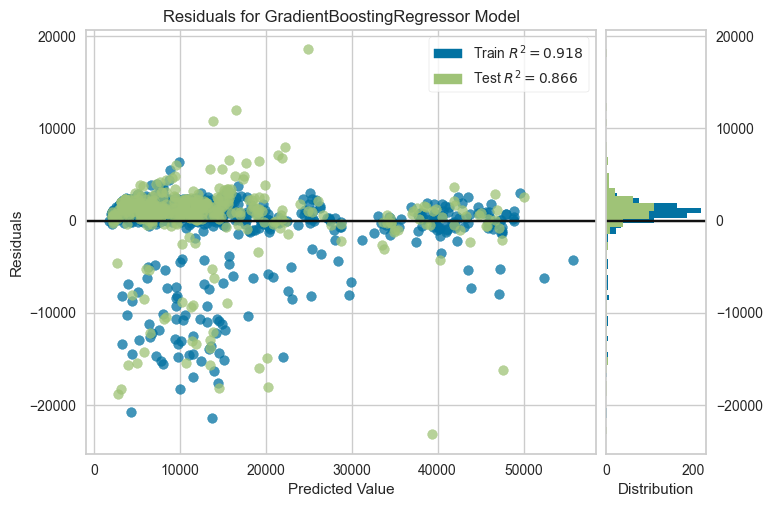

In [7]:
# Plot residuals of trained model
plot_model(gbr, plot='residuals')

In [8]:
# Save transformation pipeline and model
save_model(gbr, model_name='./model/gbr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
               